## DATA VISUALIZATION

Graphs I need: 

- KE vs. phi (lab & cm)
- KE vs. theta (lab & cm)
- KE histogram for various angles
- KE vs. vz
- vx vs. vy
- z histogram

In [43]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt #type: ignore
import pandas as pd # type: ignore
import h5py # type: ignore
import json
import sys

In [ ]:
# READ IN JSON FILE

config_path = '/workspaces/attpc_simulations/config.json'
with open(config_path, 'r') as f:
    config = json.load(f)

# READ IN HDF5 FILE
file = '/workspaces/attpc_simulations/output/detector/eloss_0001.h5'  # Adjust the file name as necessary
with h5py.File(file, 'r') as hdf:
    # List all groups
    print("Keys: %s" % hdf.keys())
    a_group_key = list(hdf.keys())[0]  # Take the first group

    # Get the data
    data = list(hdf[a_group_key])

In [44]:
# Example values ripped from h5 file
run_num = '0001'
nucleus_select = [['TARGET',0],['PROJECTILE',1],['EJECTILE',2],['RESIDUAL',3]]

event_KEs = [ [1.0,2.0,3.0,4.0] , [5.0,6.0,7.0,8.0] ] 
event_thetas_lab = [ [11.0,21.0,31.0,41.0] , [51.0,61.0,71.0,81.0] ]
event_thetas_cm = [ [12.0,22.0,32.0,42.0] , [52.0,62.0,72.0,82.0] ] 
event_phis_lab = [ [12.0,22.0,32.0,42.0] , [52.0,62.0,72.0,82.0] ] 
event_phis_cm = [ [12.0,22.0,32.0,42.0] , [52.0,62.0,72.0,82.0] ] 
event_x0s = [ [10.0,9.0,8.0,7.0] , [6.0,5.0,4.0,3.0] ]



# The info for all events of all nuclei in one run, stored in a single "flattened" list
KEs = [item for sublist in event_KEs for item in sublist]
thetas_lab = [item for sublist in event_thetas_lab for item in sublist]
phis_lab = [item for sublist in event_phis_lab for item in sublist]
theta_cm = [item for sublist in event_thetas_cm for item in sublist]
phis_cm = [item for sublist in event_phis_cm for item in sublist]

# Count/event/bin numbers
num_counts = len(KEs)
num_events = len(event_x0s)
num_bins = 20 


# The info for all events of one nucleus in one run, stored in a single "flattened" list
nuc = 0 # which nucleus we're looking at, denoted by nucleus_select order
nuc_KEs = [i[nuc] for i in event_KEs]
nuc_thetas_lab = [i[nuc] for i in event_thetas_lab]
nuc_phis_lab = [i[nuc] for i in event_phis_lab]
nuc_thetas_cm = [i[nuc] for i in event_thetas_cm]
nuc_phis_cm = [i[nuc] for i in event_phis_cm]

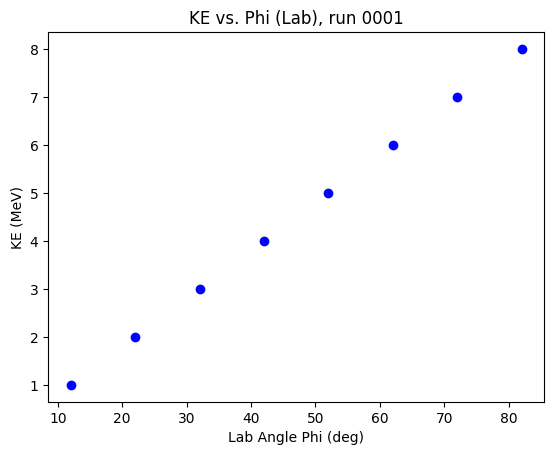

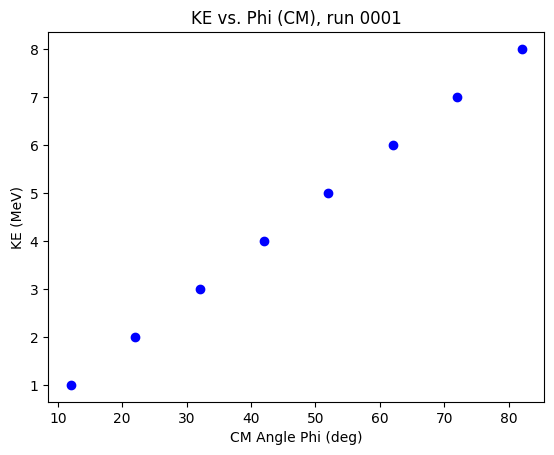

In [42]:
# KE vs. Phi (Lab)
plt.title(f"KE vs. Phi (Lab), run {run_num}")
plt.xlabel("Lab Angle Phi (deg)")
plt.ylabel("KE (MeV)")
plt.scatter(phis_lab, KEs, c ="blue")
plt.show()

# KE vs. Phi (CM)
plt.title(f"KE vs. Phi (CM), run {run_num}")
plt.xlabel("CM Angle Phi (deg)")
plt.ylabel("KE (MeV)")
plt.scatter(phis_cm, KEs, c ="blue")
plt.show()

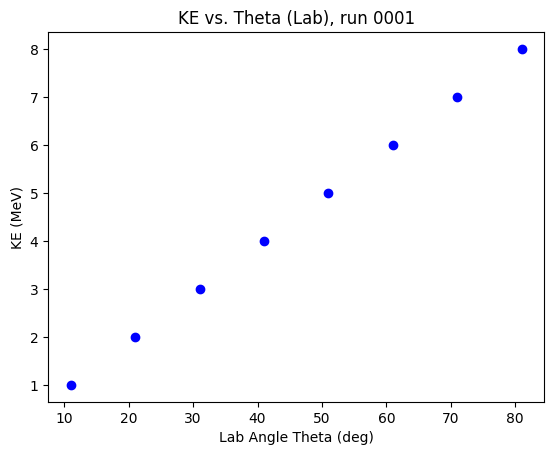

In [41]:
# KE vs. Theta (Lab)
plt.title(f"KE vs. Theta (Lab), run {run_num}")
plt.xlabel("Lab Angle Theta (deg)")
plt.ylabel("KE (MeV)")
plt.scatter(thetas_lab, KEs, c ="blue")
plt.show()

# KE vs. Theta (CM)
plt.title(f"KE vs. Theta (CM), run {run_num}")
plt.xlabel("CM Angle Theta (deg)")
plt.ylabel("KE (MeV)")
plt.scatter(thetas_lab, KEs, c ="blue")
plt.show()

In [ ]:
# KE Histograms for various angles

# 20 deg



# 40 deg 



# 60 deg



# 80 deg



# 100 deg



C:\Users\Owner\AppData\Local\Temp\ipykernel_12472\381057040.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
C:\Users\Owner\AppData\Local\Temp\ipykernel_12472\381057040.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1,0].legend()
C:\Users\Owner\AppData\Local\Temp\ipykernel_12472\381057040.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()
C:\Users\Owner\AppData\Local\Temp\ipykernel_12472\381057040.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argum

Text(0.5, 1.0, 'Sine and Cosine functions')

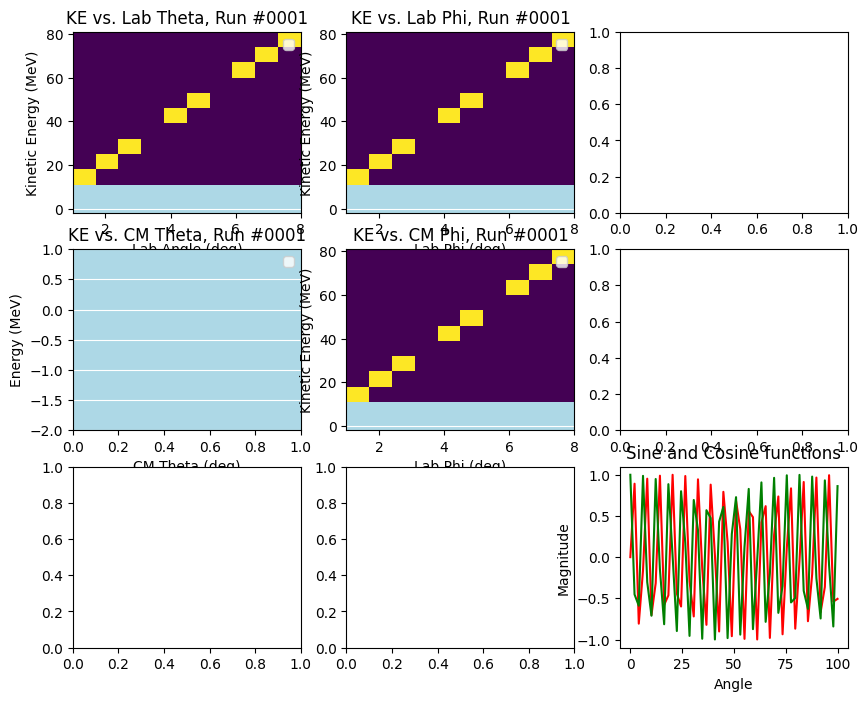

In [25]:
size = 4*(1.05 - (1-np.exp(-2E-4 * num_events)))
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(10,8))

# KE vs. Theta (Lab)
ax[0,0].set_xlabel("Lab Angle (deg)")
ax[0,0].set_ylabel("Kinetic Energy (MeV)")
ax[0,0].set_title(f"KE vs. Lab Theta, Run #{run_num}")
ax[0,0].set_facecolor('#ADD8E6')
ax[0,0].set_axisbelow(True)
ax[0,0].yaxis.grid(color='white', linestyle='-')
ax[0,0].hist2d(KEs, angles_lab)
#ax[0,0].set_xlim(-50,50)
ax[0,0].set_ylim(-2)
ax[0,0].legend()

# KE vs. Theta (CM)
ax[1,0].set_xlabel("CM Theta (deg)")
ax[1,0].set_ylabel("Energy (MeV)")
ax[1,0].set_title(f"KE vs. CM Theta, Run #{run_num}")
ax[1,0].set_facecolor('#ADD8E6')
ax[1,0].set_axisbelow(True)
ax[1,0].yaxis.grid(color='white', linestyle='-')
#ax[1,0].set_xlim(-50,50)
ax[1,0].set_ylim(-2)
ax[1,0].legend()

# KE vs. Phi (Lab)
ax[0,1].set_xlabel("Lab Phi (deg)")
ax[0,1].set_ylabel("Kinetic Energy (MeV)")
ax[0,1].set_title(f"KE vs. Lab Phi, Run #{run_num}")
ax[0,1].set_facecolor('#ADD8E6')
ax[0,1].set_axisbelow(True)
ax[0,1].yaxis.grid(color='white', linestyle='-')
ax[0,1].hist2d(KEs, angles_lab)
#ax[0,1].set_xlim(-50,50)
ax[0,1].set_ylim(-2)
ax[0,1].legend()

# KE vs. Phi (CM)
ax[1,1].set_xlabel("Lab Phi (deg)")
ax[1,1].set_ylabel("Kinetic Energy (MeV)")
ax[1,1].set_title(f"KE vs. CM Phi, Run #{run_num}")
ax[1,1].set_facecolor('#ADD8E6')
ax[1,1].set_axisbelow(True)
ax[1,1].yaxis.grid(color='white', linestyle='-')
ax[1,1].hist2d(KEs, angles_lab)
#ax[1,1].set_xlim(-50,50)
ax[1,1].set_ylim(-2)
ax[1,1].legend()







# Assign variables to the y axis part of the curve
X = np.linspace(0,100,50)
y = np.sin(X)
z = np.cos(X)

# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='sin')
plt.plot(X, z, color='g', label='cos')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Angle")
plt.ylabel("Magnitude")
plt.title("Sine and Cosine functions")

In [ ]:
size = 4*(1.05 - (1-np.exp(-2E-4 * self.nreactions)))
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(10,8))

ax[0,0].set_xlabel("CM angle")
ax[0,0].set_ylabel("Energy (MeV/U)")
ax[0,0].set_title(f"vz = {self.xdim / 2}, random CM")
ax[0,0].set_facecolor('#ADD8E6')
ax[0,0].set_axisbelow(True)
ax[0,0].yaxis.grid(color='white', linestyle='-')
ax[0,0].scatter(x=self.Cm1[self.DETECTED1],y=self.Energy11[self.DETECTED1],s=size,c="#ff7f0e")
ax[0,0].scatter(x=self.Cm1[self.DETECTED1],y=self.Energy12[self.DETECTED1],s=size,c="#1f77b4")
ax[0,0].scatter(x=-100,y=-100,s=10,c="#ff7f0e",label="Er")
ax[0,0].scatter(x=-100,y=-100,s=10,c="#1f77b4",label="Ee")
ax[0,0].set_xlim(-0.1,max(self.Cm1)+0.1)
ax[0,0].set_ylim(-2)
ax[0,0].legend()

ax[0,1].axis('off')
ax[0,2].axis('off')

ax[1,0].set_xlabel("CM angle")
ax[1,0].set_ylabel("Energy (MeV/U)")
ax[1,0].set_title(f"Random vz, CM")
ax[1,0].set_facecolor('#ADD8E6')
ax[1,0].set_axisbelow(True)
ax[1,0].yaxis.grid(color='white', linestyle='-')
ax[1,0].scatter(x=self.Cm2[self.DETECTED2],y=self.Energy21[self.DETECTED2],s=size,c="#ff7f0e")
ax[1,0].scatter(x=self.Cm2[self.DETECTED2],y=self.Energy22[self.DETECTED2],s=size,c="#1f77b4")

ax[1,1].set_xlabel("Vertex")
ax[1,1].set_facecolor('#ADD8E6')
ax[1,1].set_axisbelow(True)
ax[1,1].yaxis.grid(color='white', linestyle='-')
ax[1,1].scatter(x=self.vz2[self.DETECTED2],y=self.Energy21[self.DETECTED2],s=size,c="#FC776AFF")
ax[1,1].scatter(x=self.vz2[self.DETECTED2],y=self.Energy22[self.DETECTED2],s=size,c="#5B84B1FF")
ax[1,1].scatter(x=-100,y=-100,s=10,c="#FC776AFF",label="Er")
ax[1,1].scatter(x=-100,y=-100,s=10,c="#5B84B1FF",label="Ee")
ax[1,1].set_xlim(-2,max(self.vz2)+2)
ax[1,1].set_ylim(-2)
ax[1,1].legend()

ax[1,2].axis('off')

ax[2,0].set_xlabel("CM angle")
ax[2,0].set_ylabel("Energy (MeV/U)")
ax[2,0].set_title(f"Random vz, CM, ex")
ax[2,0].set_facecolor('#ADD8E6')
ax[2,0].set_axisbelow(True)
ax[2,0].yaxis.grid(color='white', linestyle='-')
ax[2,0].scatter(x=self.Cm3[self.DETECTED3],y=self.Energy31[self.DETECTED3],s=size,c="#ff7f0e")
ax[2,0].scatter(x=self.Cm3[self.DETECTED3],y=self.Energy32[self.DETECTED3],s=size,c="#1f77b4")
ax[2,1].set_xlabel("Vertex")
ax[2,1].set_facecolor('#ADD8E6')
ax[2,1].set_axisbelow(True)
ax[2,1].yaxis.grid(color='white', linestyle='-')
ax[2,1].scatter(x=self.vz3[self.DETECTED3],y=self.Energy31[self.DETECTED3],s=size,c="#FC776AFF")
ax[2,1].scatter(x=self.vz3[self.DETECTED3],y=self.Energy32[self.DETECTED3],s=size,c="#5B84B1FF")

ax[2,2].set_xlabel("Ex")
ax[2,2].set_facecolor('#ADD8E6')
ax[2,2].set_axisbelow(True)
ax[2,2].yaxis.grid(color='white', linestyle='-')
ax[2,2].scatter(x=self.Excite3[self.DETECTED3],y=self.Energy31[self.DETECTED3],s=size,c="#5F4B8BFF")
ax[2,2].scatter(x=self.Excite3[self.DETECTED3],y=self.Energy32[self.DETECTED3],s=size,c="#E69A8DFF")
ax[2,2].scatter(x=-100,y=-100,s=10,c="#5F4B8BFF",label="Er")
ax[2,2].scatter(x=-100,y=-100,s=10,c="#E69A8DFF",label="Ee")
ax[2,2].set_xlim(min(self.Excite3[self.DETECTED3])-0.2,max(self.Excite3[self.DETECTED3])+0.2)
ax[2,2].set_ylim(-1)
ax[2,2].legend()

plt.tight_layout()
plt.savefig(os.path.join(self.temp_folder,f"{datetime.now():%Y_%m_%d-%H_%M}_energy.png"),format="png")
plt.cla()
plt.clf()
plt.close('all')

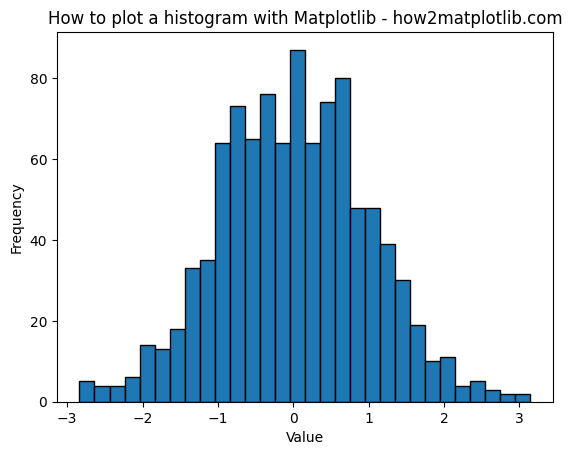

In [6]:
# Generate some sample data
data = np.random.normal(0, 1, 1000)

# Create a simple histogram
plt.hist(data, bins=30, edgecolor='black')
plt.title('How to plot a histogram with Matplotlib - how2matplotlib.com')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()